# Canada CPI Visualization

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_cad = pd.read_csv('./data/Canada-CPI-2018-2023.csv')
df_cad.head()

,REF_DATE,GEO,DGUID,Products and product groups,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2018-07,Canada,2016A000011124,All-items,2002=100,17,units,0,v41690973,2.2,134.3,NaN,NaN,NaN,1
1,2018-08,Canada,2016A000011124,All-items,2002=100,17,units,0,v41690973,2.2,134.2,NaN,NaN,NaN,1
2,2018-09,Canada,2016A000011124,All-items,2002=100,17,units,0,v41690973,2.2,133.7,NaN,NaN,NaN,1
3,2018-10,Canada,2016A000011124,All-items,2002=100,17,units,0,v41690973,2.2,134.1,NaN,NaN,NaN,1
4,2018-11,Canada,2016A000011124,All-items,2002=100,17,units,0,v41690973,2.2,133.5,NaN,NaN,NaN,1


In [3]:
df_gat = pd.read_csv('./data/Ontario-CPI-2018-2023.csv')
df_gat.head()

,REF_DATE,GEO,DGUID,Products and product groups,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2018-07,Ontario,2016A000235,All-items,2002=100,17,units,0,v41691919,14.2,136.0,NaN,NaN,NaN,1
1,2018-08,Ontario,2016A000235,All-items,2002=100,17,units,0,v41691919,14.2,135.9,NaN,NaN,NaN,1
2,2018-09,Ontario,2016A000235,All-items,2002=100,17,units,0,v41691919,14.2,135.2,NaN,NaN,NaN,1
3,2018-10,Ontario,2016A000235,All-items,2002=100,17,units,0,v41691919,14.2,135.6,NaN,NaN,NaN,1
4,2018-11,Ontario,2016A000235,All-items,2002=100,17,units,0,v41691919,14.2,135.1,NaN,NaN,NaN,1


## Let's take a look at Canada CPI changes first

In [4]:
df_cad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REF_DATE                     915 non-null    object 
 1   GEO                          915 non-null    object 
 2   DGUID                        915 non-null    object 
 3   Products and product groups  915 non-null    object 
 4   UOM                          915 non-null    object 
 5   UOM_ID                       915 non-null    int64  
 6   SCALAR_FACTOR                915 non-null    object 
 7   SCALAR_ID                    915 non-null    int64  
 8   VECTOR                       915 non-null    object 
 9   COORDINATE                   915 non-null    float64
 10  VALUE                        915 non-null    float64
 11  STATUS                       0 non-null      float64
 12  SYMBOL                       0 non-null      float64
 13  TERMINATED          

In [5]:
# change REF_DATE datatype to datetime
df_cad['REF_DATE'] = pd.to_datetime(df_cad['REF_DATE'])
df_gat['REF_DATE'] = pd.to_datetime(df_gat['REF_DATE'])
df_cad['REF_DATE'].head()

0   2018-07-01
1   2018-08-01
2   2018-09-01
3   2018-10-01
4   2018-11-01
Name: REF_DATE, dtype: datetime64[ns]

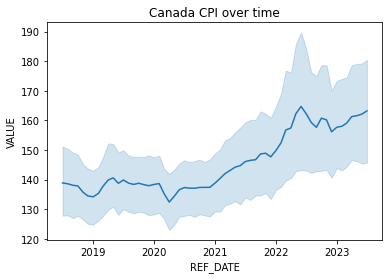

In [6]:
# plot canada cpi over time
sns.lineplot(x='REF_DATE', y='VALUE', data=df_cad)
plt.title('Canada CPI over time')
plt.show()

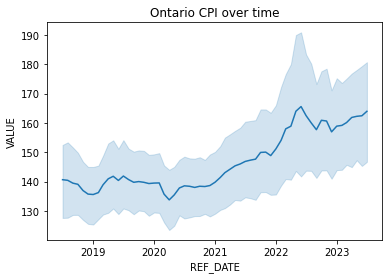

In [7]:
# plot Ontario cpi over time
sns.lineplot(x='REF_DATE', y='VALUE', data=df_gat)
plt.title('Ontario CPI over time')
plt.show()

In [8]:
# filter data Products and product groups to All-items
df_cad_all = df_cad[df_cad['Products and product groups'] == 'All-items']
df_gat_all = df_gat[df_gat['Products and product groups'] == 'All-items']


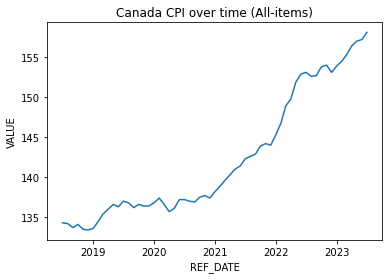

In [9]:
sns.lineplot(x='REF_DATE', y='VALUE', data=df_cad_all)
plt.title('Canada CPI over time (All-items)')
plt.show()

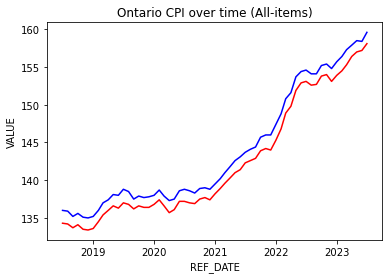

In [10]:
sns.lineplot(x='REF_DATE', y='VALUE', data=df_gat_all, color='blue')
sns.lineplot(x='REF_DATE', y='VALUE', data=df_cad_all, color='red')
plt.title('Ontario CPI over time (All-items)')
plt.show()

## plot the CPI changes over time by products

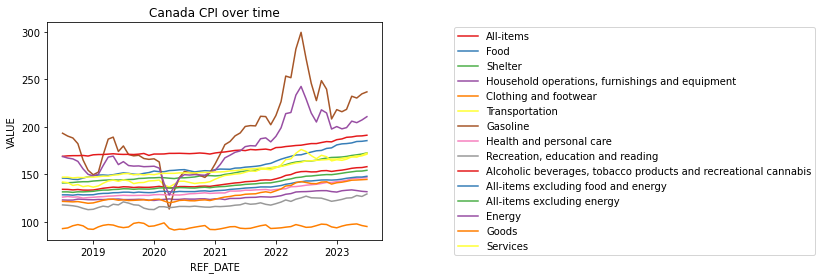

<Figure size 1440x720 with 0 Axes>

In [11]:
# plot canada cpi over time
fg = sns.lineplot(x='REF_DATE', y='VALUE', data=df_cad, hue='Products and product groups', palette="Set1")
plt.title('Canada CPI over time')
plt.figure(figsize=(20,10))
fg.legend(bbox_to_anchor= (1.2,1))
plt.show()